In [67]:
#starting time 
import time
start = time.time()

**Importing necessary packages**

In [68]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#for drawing decision tree
import graphviz
from graphviz import Source
from sklearn.tree import export_graphviz

# Common imports
import numpy as np
import os


**Exploratary Data Analysis**

In [69]:
bankdata = pd.read_csv('bank-additional-full.csv', sep = ';')
bankdata.shape

(41188, 21)

In [70]:
bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [71]:
bankdata.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [72]:
#checking whether there is a missing value in the dataset
bankdata.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [73]:
#No. of unique entries in each attribute
bankdata.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

**Train Valid Test Split**

In [74]:
#for splitting the dataset into train test data
from sklearn.model_selection import train_test_split
#Spliting into Train & Test Data
train_X,test_X,train_Y,test_Y = sklearn.model_selection.train_test_split(bankdata.iloc[:,:20],bankdata.iloc[:,20:21],train_size=0.85, test_size=0.15)
train_X,valid_X,train_Y,valid_Y = sklearn.model_selection.train_test_split(train_X,train_Y,train_size=0.85, test_size=0.15)

In [75]:
len(train_X),len(test_X),len(valid_X)

(29757, 6179, 5252)

In [76]:
#finding the categorical variable for preprocessing
s = (train_X.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [77]:
#finding the numerical variable for preprocessing
d1 = (train_X.dtypes == 'int64' )
numeric_cols1 = list(d1[d1].index)
d2 = (train_X.dtypes =='float64')
numeric_cols =numeric_cols1 + list(d2[d2].index)
print("Numerical variables:")
print(numeric_cols)

Numerical variables:
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


**Data Visualization**

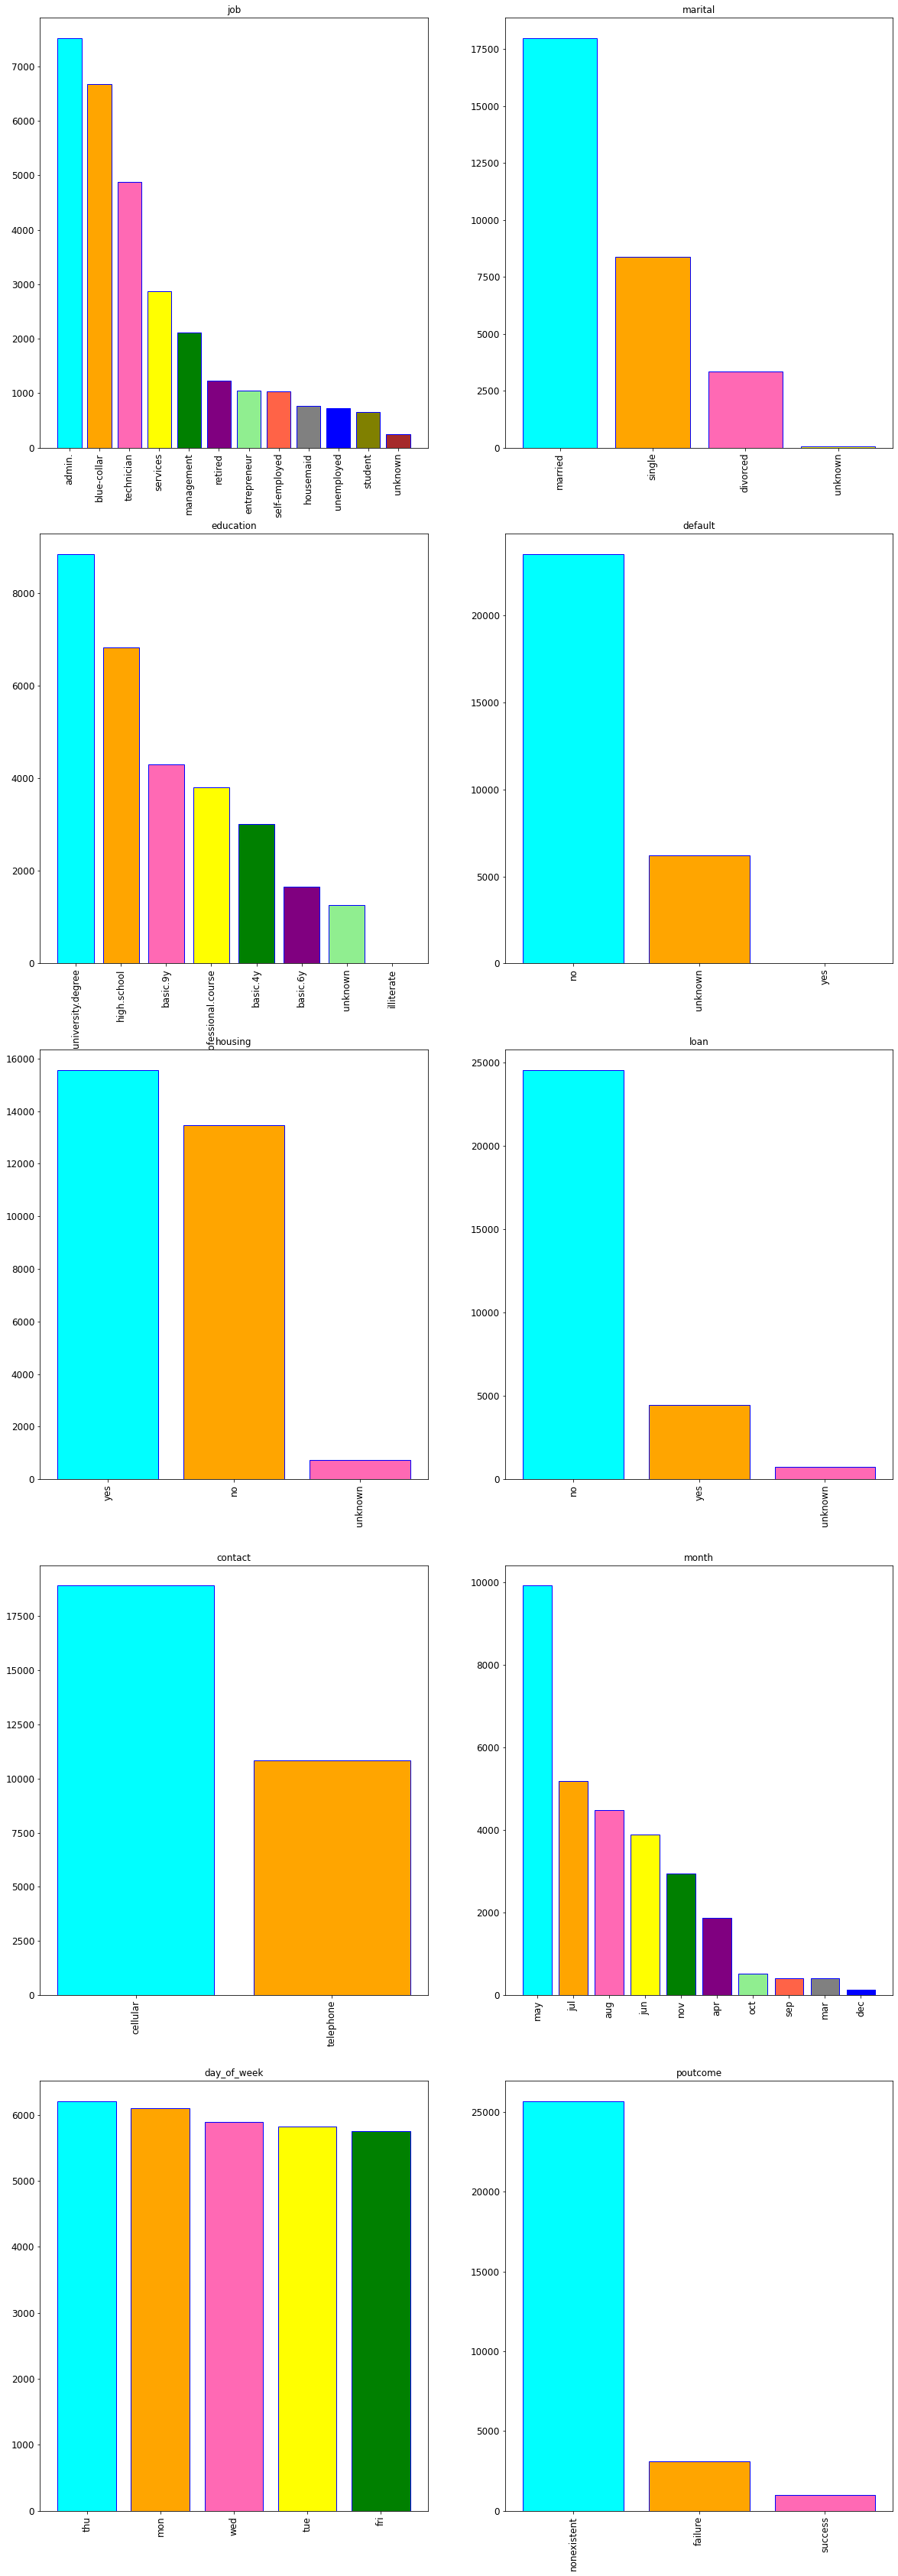

In [78]:
#First we have plotted bar-diagram with respect to the class labels for categorical variables. 
fig , axis = plt.subplots(5, 2, sharex=False, sharey=False, figsize=(20, 60))

flag = 0

for i in object_cols:
    value_counts = train_X[i].value_counts()
    trace_x = flag // 2
    trace_y = flag % 2
    x_pos = np.arange(0, len(value_counts))
    
    axis[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index,color = ["cyan","orange","hotpink","yellow","green","purple","lightgreen","tomato","grey","blue","olive","brown"],edgecolor = "blue")

    axis[trace_x, trace_y].set_title(i)
    
    for tick in axis[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    flag += 1

plt.show()

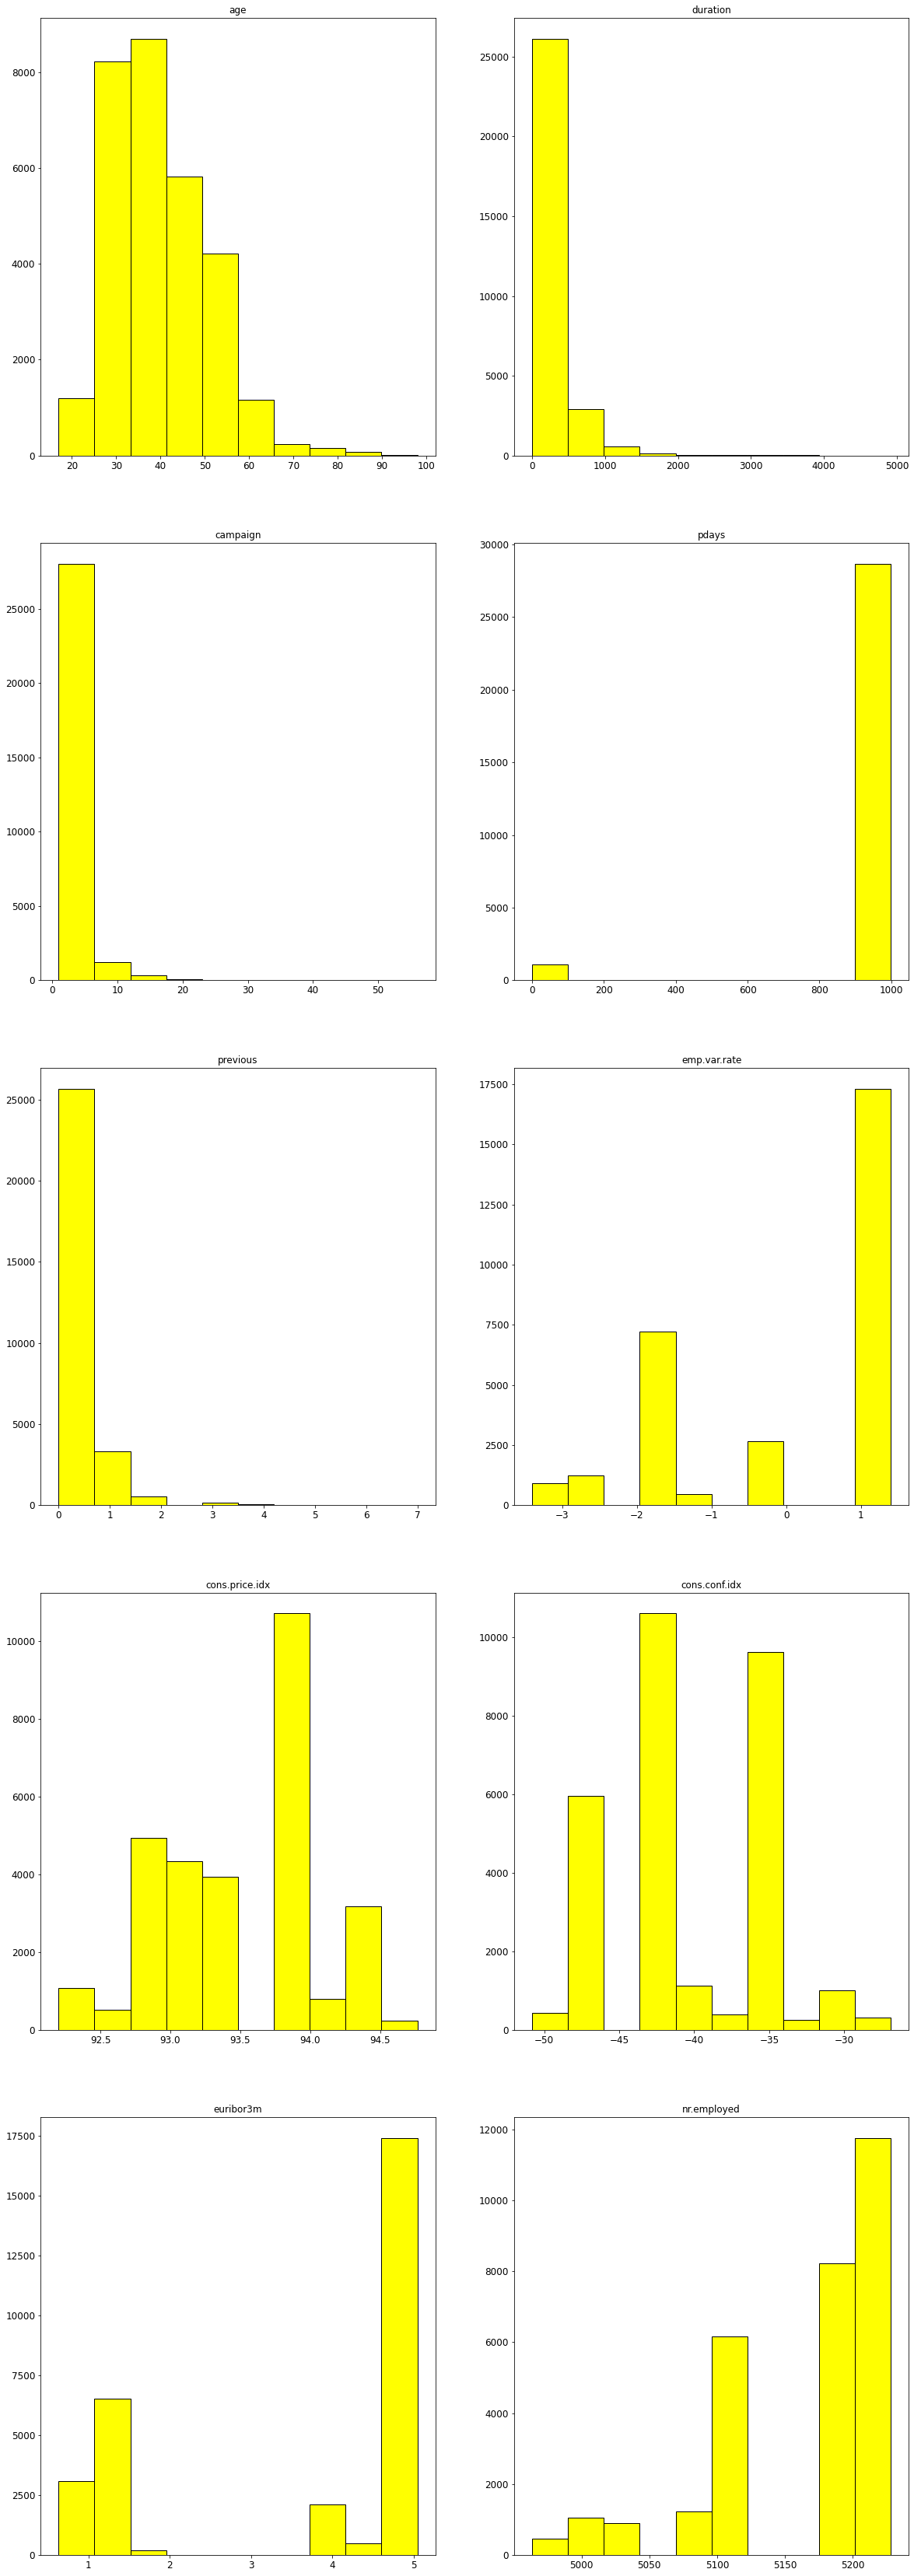

In [79]:
#Then we have plotted histogram for the numerical variables. 
fig , axis = plt.subplots(5, 2, sharex=False, sharey=False, figsize=(20, 60))

flag = 0

for i in numeric_cols:
    
    trace_x = flag // 2
    trace_y = flag % 2
    
    axis[trace_x, trace_y].hist(train_X[i],color = "yellow",edgecolor = "black")

    axis[trace_x, trace_y].set_title(i)
    
    
    flag += 1

plt.show()

In [80]:
#Dropping the column default, since it contains a very few number of "yes" and a large number of "unknown"
train_X = train_X.drop('default',axis = "columns")
valid_X = valid_X.drop('default',axis = "columns")
test_X = test_X.drop('default',axis = "columns")

In [81]:
#finding the categorical variable again after dropping the "default" column
s = (train_X.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


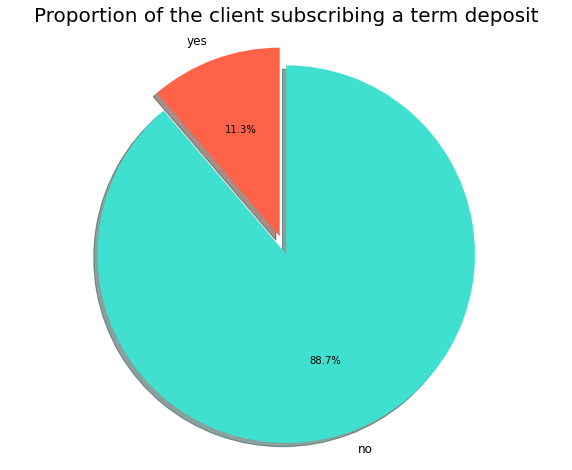

In [82]:
#Pie-Chart of output variable
labels = 'yes', 'no'
sizes = [train_Y.y[train_Y['y']=='yes'].count(), train_Y.y[train_Y['y']=='no'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors =["tomato","turquoise"] )
ax1.axis('equal')
plt.title("Proportion of the client subscribing a term deposit", size = 20)
plt.show()

It is a highly imbalanced data as most of the clients in the training set are likely to not subscribe the term deposit.

# Model-1 : Decision Tree

We have used OneHotEncoding to encode the categorical features.

In [83]:
#encoding the train data
label_X_train = pd.get_dummies(train_X, columns =object_cols)
print(len(label_X_train.columns))
label_X_train.head()

60


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
1340,36,218,2,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
29690,52,181,2,999,1,-1.8,93.075,-47.1,1.405,5099.1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5464,47,107,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3533,51,247,1,999,0,1.1,93.994,-36.4,4.859,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
30410,56,95,1,999,0,-1.8,93.075,-47.1,1.365,5099.1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [84]:
#encoding the validation data
label_X_valid = pd.get_dummies(valid_X, columns =object_cols)
print(len(label_X_valid.columns))
label_X_valid.head()

60


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
17674,39,210,3,999,0,1.4,93.918,-42.7,4.962,5228.1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
10283,54,100,17,999,0,1.4,94.465,-41.8,4.960,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
31054,38,147,1,999,0,-1.8,92.893,-46.2,1.334,5099.1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
37748,24,53,1,999,0,-2.9,92.201,-31.4,0.849,5076.2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
28902,19,156,1,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [85]:
#encoding the test data
label_X_test = pd.get_dummies(test_X, columns =object_cols)
print(len(label_X_test.columns))
label_X_test.head()

60


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
32884,57,371,1,999,1,-1.8,92.893,-46.2,1.299,5099.1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3169,55,285,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
32206,33,52,1,999,1,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
9403,36,355,4,999,0,1.4,94.465,-41.8,4.967,5228.1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
14020,27,189,2,999,0,1.4,93.918,-42.7,4.963,5228.1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


- It is an highly imbalanced data where no. of "no"(0 after encoding) is much higher than no. of "yes"(1 after encoding).
- So, we have used the class_weight parameter. Here we have given more weight to 'yes' to counteract the effect of it being a minority target variable in the dataset.

In [86]:
pause = time.time()

In [87]:
#for fitting a model using DecisionTree
from sklearn.tree import DecisionTreeClassifier
#for computing Mean Absolute Error
from sklearn.metrics import mean_absolute_error
# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid,i):
    model = DecisionTreeClassifier(max_depth = i, random_state=42,class_weight={0:1,1:3})
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return (mean_absolute_error(y_valid, preds))

In [88]:
#for ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
Y_train = ordinal_encoder.fit_transform(train_Y)
Y_test = ordinal_encoder.fit_transform(test_Y)
Y_valid = ordinal_encoder.fit_transform(valid_Y)

In [89]:
MAE = 1
for i in range(1,20):
    
    print("MAE:",score_dataset(label_X_train, label_X_valid, Y_train, Y_valid,i),"max_depth =",i)
    if MAE > score_dataset(label_X_train, label_X_valid, Y_train, Y_valid,i):
        MAE = score_dataset(label_X_train, label_X_valid, Y_train, Y_valid,i) 
        max_depth = i

MAE: 0.12223914699162224 max_depth = 1
MAE: 0.10967250571210967 max_depth = 2
MAE: 0.10967250571210967 max_depth = 3
MAE: 0.11176694592536177 max_depth = 4
MAE: 0.09900990099009901 max_depth = 5
MAE: 0.10472201066260473 max_depth = 6
MAE: 0.1011043412033511 max_depth = 7
MAE: 0.09824828636709824 max_depth = 8
MAE: 0.09558263518659559 max_depth = 9
MAE: 0.09558263518659559 max_depth = 10
MAE: 0.09672505712109672 max_depth = 11
MAE: 0.10015232292460015 max_depth = 12
MAE: 0.0992003046458492 max_depth = 13
MAE: 0.10472201066260473 max_depth = 14
MAE: 0.10186595582635187 max_depth = 15
MAE: 0.10281797410510282 max_depth = 16
MAE: 0.10167555217060167 max_depth = 17
MAE: 0.10281797410510282 max_depth = 18
MAE: 0.1011043412033511 max_depth = 19


We have computed the mean absolute error for different parameters and obtained the optimum value of depth. So we fit the Decision tree classifier with that depth.

In [90]:
restart = time.time()

In [91]:
tree=DecisionTreeClassifier(max_depth=max_depth, random_state=42,class_weight={'no':1,'yes':3})
tree.fit(label_X_train,train_Y)

DecisionTreeClassifier(class_weight={'no': 1, 'yes': 3}, max_depth=9,
                       random_state=42)

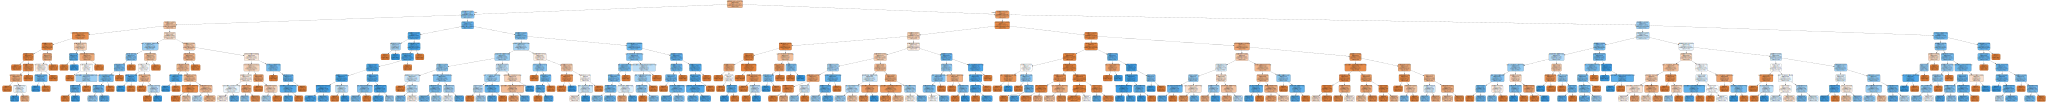

In [92]:
export_graphviz(
        tree,
        out_file=os.path.join(IMAGES_PATH, "tree.dot"),
        feature_names=label_X_train.columns[:60],
        class_names=np.unique(train_Y),
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "tree.dot"))

In [93]:
#memory used in fitting the Train data to the model
%load_ext memory_profiler
from memory_profiler import profile

%memit tree.fit(label_X_train,train_Y)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 249.04 MiB, increment: 7.05 MiB


In [94]:
pred_Y = tree.predict(label_X_test)

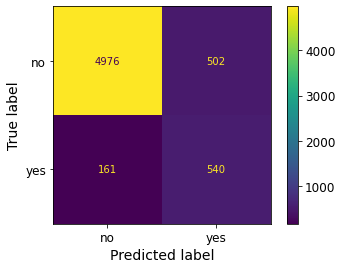

In [95]:
#confusion matrix for Decision Tree

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

f = open("decision_tree.txt", "w")

accuracy_score = metrics.accuracy_score(test_Y, pred_Y)

con_matrix = confusion_matrix(test_Y,pred_Y, labels=['no','yes'])

report_matrix = classification_report(test_Y, pred_Y,labels=['no','yes'])

L = [str(accuracy_score),"\n\n",str(con_matrix),'\n\n', str(report_matrix)] 
f.writelines(L) 
f.close()

from sklearn.metrics import ConfusionMatrixDisplay

fig = plt.figure()
Disp =ConfusionMatrixDisplay(con_matrix,display_labels=['no','yes'])
Disp.plot()
plt.savefig("decision_tree_confusion_matrix")
plt.close(fig)

In [96]:
print(report_matrix)

              precision    recall  f1-score   support

          no       0.97      0.91      0.94      5478
         yes       0.52      0.77      0.62       701

    accuracy                           0.89      6179
   macro avg       0.74      0.84      0.78      6179
weighted avg       0.92      0.89      0.90      6179



In [97]:
end = time.time()
print("Total time taken:",((end - restart) + (pause - start)),"seconds")

Total time taken: 14.01563286781311 seconds
